In [102]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Question 1

This question explores the use of Pearson's correlation as a feature selection metric. We are given the following training dataset:

In [103]:
f1 = np.array([0.3510, 2.1812, 0.2415, -0.1096, 0.1544])
f2 = np.array([1.1796, 2.1068, 1.7753, 1.2747, 2.0851])
f3 = np.array([-0.9852, 1.3766, -1.3244, -0.6316, -0.8320])
y = np.array([0.2758, 1.4392, -0.4611, 0.6154, 1.0006])

What are the top two features we should select if we use Pearson's correlation as a feature selection metric?

In [104]:
mu_1 = f1.mean()
mu_2 = f2.mean()
mu_3 = f3.mean()
mu_y = y.mean()

sd_1 = f1.std()
sd_2 = f2.std()
sd_3 = f3.std()
sd_y = y.std()

cov_1 = np.cov(f1, y, bias=True)[0, 1]
cov_2 = np.cov(f2, y, bias=True)[0, 1]
cov_3 = np.cov(f3, y, bias=True)[0, 1]
print(np.cov(f1, y, bias=True))

cor_1 = cov_1 / (sd_1 * sd_y)
cor_2 = cov_2 / (sd_2 * sd_y)
cor_3 = cov_3 / (sd_3 * sd_y)

print(cor_1)
print(cor_2)
print(cor_3)

[[0.6772 0.3188]
 [0.3188 0.4185]]
0.5987722845227617
0.45369218508997844
0.8008916458435772


In [105]:
print(np.corrcoef(f1, y)[0, 1])
print(np.corrcoef(f2, y)[0, 1])
print(np.corrcoef(f3, y)[0, 1])
print(np.corrcoef(f1, y))

0.5987722845227617
0.4536921850899784
0.8008916458435771
[[1.     0.5988]
 [0.5988 1.    ]]


# Question 2

This question further explores linear and ridge regression. The following data pairs are used for training:

In [106]:
# training data
X_train = np.array([-10, -8, -3, -1, 2, 7]).reshape((-1, 1))
Y_train = np.array([4.18, 2.42, 0.22, 0.12, 0.25, 3.09]).reshape((-1, 1))

The data for testing are as follows:

In [107]:
# test data
X_test = np.array([-9, -7, -5, -4, -2, 1, 4, 5, 6, 9]).reshape((-1, 1))
Y_test = np.array([3, 1.81, 0.80, 0.25, -0.19, 0.4, 1.24, 1.68, 2.32, 5.05]).reshape((-1, 1))

## Part a

Use the polynomial model from orders 1 to 6 to train and test the data without regularization. Plot the MSE over orders from 1 to 6 for both the training and the test sets. Which model order provides the best MSE in the training and test sets? Why?

In [108]:
MAX_ORDER = 200
np.set_printoptions(precision=4)

# data for plotting curves
x_plot = np.linspace(-10, 10, 100)

In [109]:
train_MSEs = []  # np.zeros(MAX_ORDER)
test_MSEs = []   # np.zeros(MAX_ORDER)

for order in range(1, MAX_ORDER+1):
    poly = PolynomialFeatures(order)
    P_train = poly.fit_transform(X_train)
    P_test = poly.fit_transform(X_test)
    # print(P_train)

    if P_train.shape[0] >= P_train.shape[1]: # 1-5 primal
        W = np.linalg.inv(P_train.T @ P_train) @ P_train.T @ Y_train
    else: # 6 dual
        W = P_train.T @ np.linalg.inv(P_train @ P_train.T) @ Y_train

    P_train_pred = P_train @ W
    P_test_pred = P_test @ W

    train_MSEs.append(mean_squared_error(Y_train, P_train_pred))
    test_MSEs.append(mean_squared_error(Y_test, P_test_pred))
    #test_MSEs[order - 1] = mean_squared_error(Y_test, P_test_pred)

print(train_MSEs)
print(test_MSEs)

C:\Users\YTTRIUM\AppData\Local\Temp\ipykernel_1600\447467291.py:13: RuntimeWarning: overflow encountered in matmul
  W = P_train.T @ np.linalg.inv(P_train @ P_train.T) @ Y_train
C:\Users\YTTRIUM\AppData\Local\Temp\ipykernel_1600\447467291.py:13: RuntimeWarning: overflow encountered in matmul
  W = P_train.T @ np.linalg.inv(P_train @ P_train.T) @ Y_train
C:\Users\YTTRIUM\AppData\Local\Temp\ipykernel_1600\447467291.py:13: RuntimeWarning: overflow encountered in matmul
  W = P_train.T @ np.linalg.inv(P_train @ P_train.T) @ Y_train
C:\Users\YTTRIUM\AppData\Local\Temp\ipykernel_1600\447467291.py:13: RuntimeWarning: overflow encountered in matmul
  W = P_train.T @ np.linalg.inv(P_train @ P_train.T) @ Y_train
C:\Users\YTTRIUM\AppData\Local\Temp\ipykernel_1600\447467291.py:13: RuntimeWarning: overflow encountered in matmul
  W = P_train.T @ np.linalg.inv(P_train @ P_train.T) @ Y_train
C:\Users\YTTRIUM\AppData\Local\Temp\ipykernel_1600\447467291.py:13: RuntimeWarning: overflow encountered in ma

ValueError: Input contains NaN.

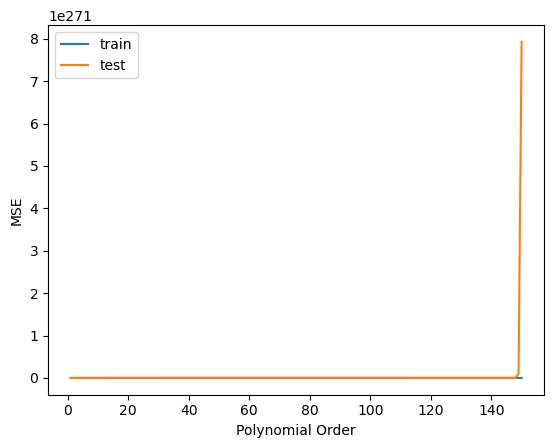

In [ ]:
plot_x = np.array(range(1, MAX_ORDER+1))
plt.plot(plot_x, train_MSEs, label="train")
plt.plot(plot_x, test_MSEs, label="test")
plt.xlabel("Polynomial Order")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Part b

Use regularization (ridge regression) `lambda=1` for all orders and repeat the same analyses. Compare the plots of (a) and (b). What do you see?

In [ ]:
train_MSEs_reg = []   # np.zeros(MAX_ORDER)
test_MSEs_reg = []    #np.zeros(MAX_ORDER)

LAMBDA = 1

for order in range(1, MAX_ORDER+1):
    poly = PolynomialFeatures(order)
    P_train = poly.fit_transform(X_train)
    P_test = poly.fit_transform(X_test)
    # print(P_train)

    if P_train.shape[0] >= P_train.shape[1]:
        reg = LAMBDA * np.identity(P_train.shape[1])
        W = np.linalg.inv(P_train.T @ P_train + reg) @ P_train.T @ Y_train
    else:
        reg = LAMBDA * np.identity(P_train.shape[0])
        W = P_train.T @ np.linalg.inv(P_train @ P_train.T + reg) @ Y_train

    P_train_pred = P_train @ W
    P_test_pred = P_test @ W

    train_MSEs_reg.append(mean_squared_error(Y_train, P_train_pred))
    test_MSEs_reg.append(mean_squared_error(Y_test, P_test_pred))

    # train_MSEs_reg[order - 1] = mean_squared_error(Y_train, P_train_pred)

print(train_MSEs_reg)
print(test_MSEs_reg)

[2.3585531011197105, 0.008456477077018444, 0.008356013483798833, 0.001807976222390347, 0.0007264963730617796, 0.00019347846088121716, 0.00021006219280030516, 0.00010800976550158301, 8.41256691087616e-05, 5.6910199103238124e-05, 4.4119837134425876e-05, 3.3773647129502766e-05, 5.7422315456067714e-05, 0.00014439714233174114, 0.43446959729681445, 24.29692452140203, 5.3656611862921855, 247593.18732521168, 863665.4299649261, 1437590165.4157057, 93451945.5148596, 8376469656186.126, 2673922426524157.0, 122489315722576.45, 5.388930576659721e+19, 1.92136663956865e+20, 9.304635630396475e+22, 6.066402635734564e+24, 1.1736285997980705e+27, 3.4641203221855225e+26, 6.316020674237534e+30, 7.899098664820744e+32, 4.765032577102211e+34, 1.0244172923613275e+34, 6.948073079108287e+37, 1.8225812389268424e+41, 5.04760062457525e+42, 6.210938467579497e+44, 1.0880349996082663e+47, 7.068748424987859e+48, 6.458815603697613e+50, 8.140957898256383e+52, 1.3419115767861973e+53, 1.1273662556347215e+55, 4.4077672434027

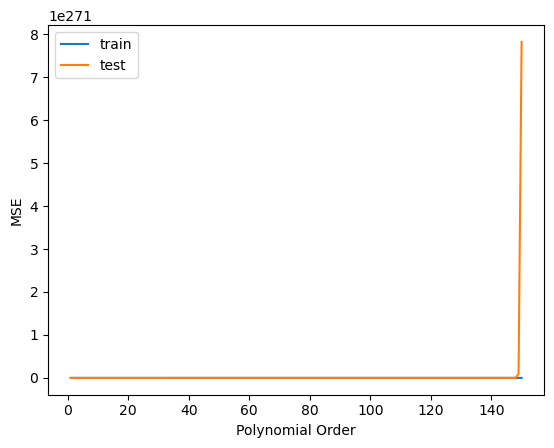

In [ ]:
plot_x = np.array(range(1, MAX_ORDER + 1))
plt.plot(plot_x, train_MSEs_reg, label="train")
plt.plot(plot_x, test_MSEs_reg, label="test")
plt.xlabel("Polynomial Order")
plt.ylabel("MSE")
plt.legend()
plt.show()